## Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### Merging 12 Months of Sales Data into a Single File

In [2]:
# list all the files from the directory
files = [file for file in os.listdir('./Sales_Data')]

# create an empty dataframe for store all of our data
all_months = pd.DataFrame()

# read all files
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months = pd.concat([all_months, df])

# save to file
all_months.to_csv('all_months_data.csv', index=False)

#### Reading new dataframe

In [3]:
all_data = pd.read_csv('all_months_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Data

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### drop Nan values 

In [5]:
drop_rows = all_data[all_data.isna().all(axis=1)]
drop_rows

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Delete 'Or' in Month Column

In [6]:
del_or = all_data[all_data['Order Date'].str[:2] == 'Or']
del_or

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
is_na = all_data[all_data.isna().all(axis=1)]
is_na

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Convert 2 Columns to Integer & float

In [9]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']).astype('float32')

### Add Month Column

In [10]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month.astype('int32')

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float32(1), int32(2), object(4)
memory usage: 9.2+ MB


### Add Sales Amount column

In [13]:
all_data['Sales Amount'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


### Add City + State column

In [14]:
# Extract a city from address column using apply function

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)


### Add Time Column

In [15]:
all_data['Time'] = pd.to_datetime(all_data['Order Date']).dt.time

### Convert Order Date to Datetime and Add Hour & Minute Columns

In [16]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22:30:00,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14:38:00,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14:38:00,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),09:27:00,9,27


-- -- 

## Answers for some Questions

### Quiz 1: What is the best Month for Sales? How much was earned that month?

In [17]:
outcomes = all_data.groupby(['Month']).sum()
outcomes

,Quantity Ordered,Price Each,Sales Amount,Hour,Minute
Month,,,,,
1,10903,1811768.375,1.822257e+06,139485,282440
2,13449,2188884.750,2.202022e+06,172669,354885
3,17005,2791207.750,2.807100e+06,218969,447559
4,20558,3367671.000,3.390670e+06,262259,544186
5,18667,3135125.000,3.152607e+06,238780,487899
6,15253,2562025.500,2.577802e+06,195528,402436
7,16072,2632539.500,2.647776e+06,206169,417349
8,13448,2230345.500,2.244468e+06,172289,353857
9,13109,2084992.125,2.097560e+06,168513,341698


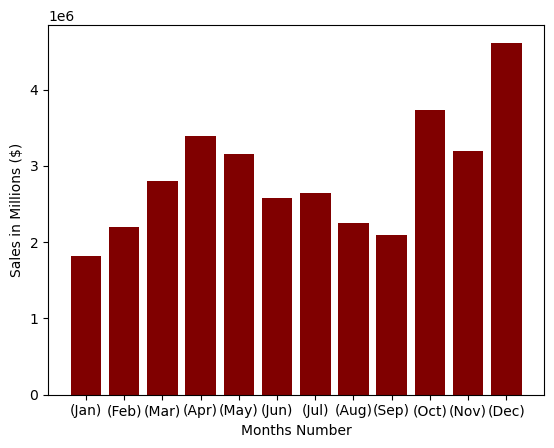

In [18]:
months = range(1, 13)
labels = ['(Jan)', '(Feb)', '(Mar)', '(Apr)','(May)', '(Jun)', '(Jul)', '(Aug)', '(Sep)', '(Oct)', '(Nov)', '(Dec)']

plt.bar(months, outcomes['Sales Amount'], tick_label=labels, width=0.8, color ='maroon')

plt.xticks(months)

plt.xlabel('Months Number')
plt.ylabel('Sales in Millions ($)')

plt.show()


-- --

### Quiz 2: What city had the highest number of sales? 

In [19]:
result = all_data.groupby(['City']).sum()
result


,Quantity Ordered,Price Each,Month,Sales Amount,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.250,104794,2.795499e+06,214264,442932
Austin (TX),11153,1809873.625,69829,1.819582e+06,141946,289060
Boston (MA),22528,3637409.750,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2752627.750,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5421435.000,208325,5.452571e+06,427444,866638
New York City (NY),27932,4635371.000,175741,4.664317e+06,357696,733598
Portland (ME),2750,447189.250,17144,4.497583e+05,35211,72856
Portland (OR),11303,1860558.250,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8211461.500,315520,8.262204e+06,643265,1319477


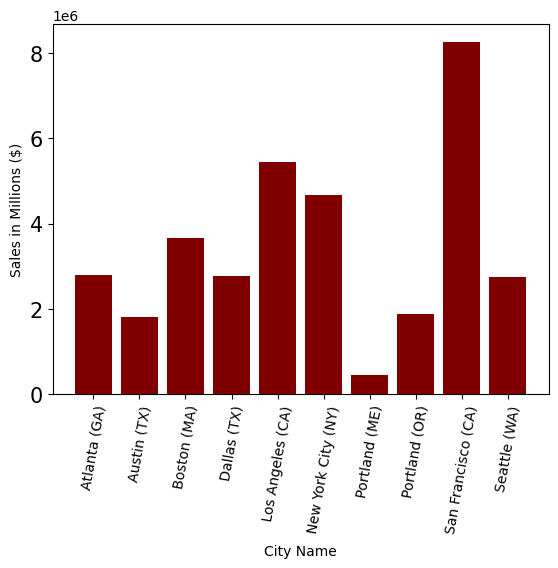

In [20]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales Amount'], width=0.8, color ='maroon')

# values = np.arange(0, 8500000, 1000000)

plt.xticks(cities, rotation='80')

plt.tick_params(axis='y', labelsize=15)
# plt.yticks(values)

plt.xlabel('City Name')
plt.ylabel('Sales in Millions ($)')

plt.show()


-- -- 

### Quiz 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22:30:00,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14:38:00,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14:38:00,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),09:27:00,9,27


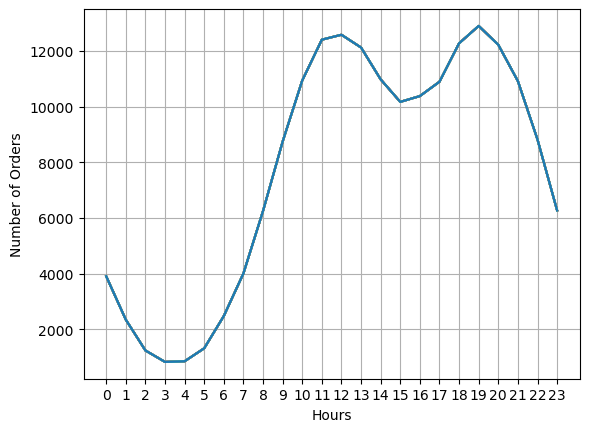

In [22]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.xticks(hours)

plt.show()

This chart kind of shows us that maybe the best time for advertisements is between 11 am to 12 pm & 18 (6 pm) to 19 (7 pm) to putting an ad, because those were the peaks of when all the orders in our dataset.

-- -- 

### Quiz 4: What product are most often sold together?

In [23]:
nw_df = all_data[all_data['Order ID'].duplicated(keep=False)]

nw_df['Together'] = nw_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

nw_df = nw_df[['Order ID', 'Together']].drop_duplicates()

nw_df.head(10)


C:\Users\esame\AppData\Local\Temp\ipykernel_2648\2449241690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df['Together'] = nw_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Together
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [24]:
# count_products = nw_df['Together'].value_counts()
# count_products

#### Another way more dynamic and productivity

In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in nw_df['Together']:
    row_ls = row.split(',')
    count.update(Counter(combinations(row_ls, 2)))  # You can add more than 2 numbers here
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


-- --

### Quiz 5: What product sold the most? Why do you think it sold the most?

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22:30:00,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14:38:00,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14:38:00,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),09:27:00,9,27


In [27]:
disply_products = all_data.groupby(['Product']).sum()['Quantity Ordered'].sort_values(ascending=False)
disply_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

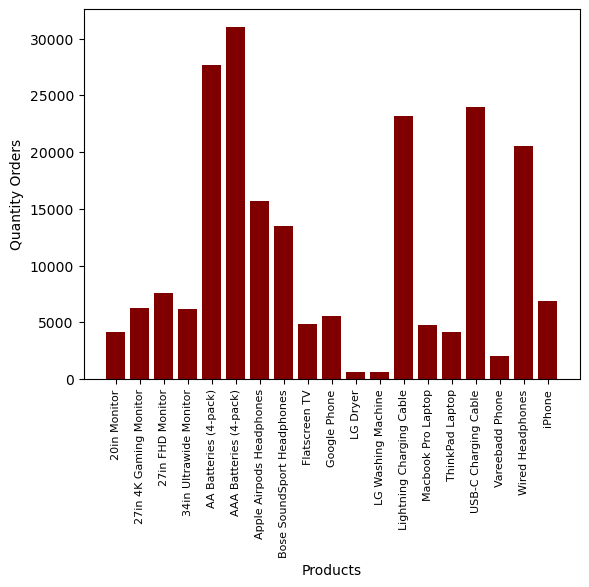

In [28]:
product_together = all_data.groupby('Product')

quntty_orders = product_together.sum()['Quantity Ordered']

products = [product for product, df in product_together]

plt.bar(products, quntty_orders, color='maroon')
plt.ylabel('Quantity Orders')
plt.xlabel('Products')
plt.xticks(products, rotation=90, size=8)

plt.show()

### Knowing the correlation between Product and Price

C:\Users\esame\AppData\Local\Temp\ipykernel_2648\707897076.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90, size=8)


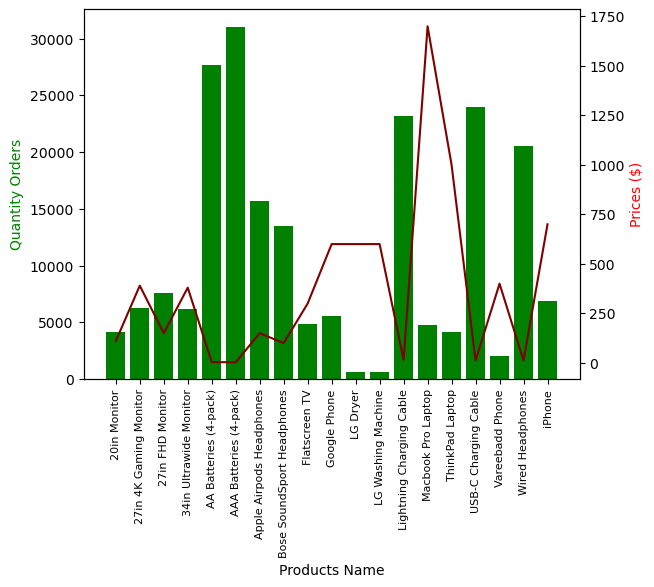

In [46]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quntty_orders, color='g')
ax2.plot(products, prices, color='maroon')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Orders', c='g')
ax2.set_ylabel('Price ($)', c='r')
ax1.set_xticklabels(products, rotation=90, size=8)

plt.show()

We note here that whenever the price of a particular product decreases, the purchase demand for this product increases, as shown in the drawing. The highest demand for products is AAA Batteries (4-pack). 

-- --

### Quiz 6: What are the top selling products?

In [30]:
top_products = all_data.groupby(['Product']).sum()['Sales Amount'].sort_values(ascending=False)
top_products

Product
Macbook Pro Laptop            8.037600e+06
iPhone                        4.794300e+06
ThinkPad Laptop               4.129959e+06
Google Phone                  3.319200e+06
27in 4K Gaming Monitor        2.435097e+06
34in Ultrawide Monitor        2.355558e+06
Apple Airpods Headphones      2.349150e+06
Flatscreen TV                 1.445700e+06
Bose SoundSport Headphones    1.345565e+06
27in FHD Monitor              1.132425e+06
Vareebadd Phone               8.272000e+05
20in Monitor                  4.541487e+05
LG Washing Machine            3.996000e+05
LG Dryer                      3.876000e+05
Lightning Charging Cable      3.470941e+05
USB-C Charging Cable          2.865012e+05
Wired Headphones              2.464784e+05
AA Batteries (4-pack)         1.061184e+05
AAA Batteries (4-pack)        9.274083e+04
Name: Sales Amount, dtype: float64

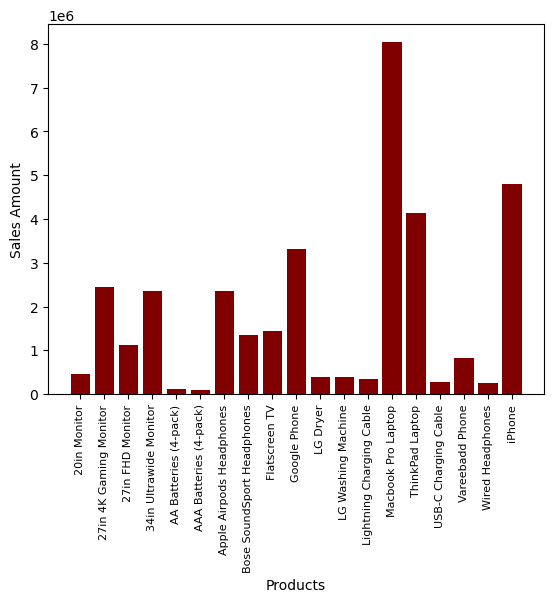

In [31]:
product_together = all_data.groupby('Product')

sales_amount = product_together.sum()['Sales Amount']

products = [product for product, df in product_together]

plt.bar(products, sales_amount, color='maroon')
plt.ylabel('Sales Amount')
plt.xlabel('Products')
plt.xticks(products, rotation=90, size=8)

plt.show()